#### Convolutional Neural Network

In [19]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [22]:
# Convolutional Neural Network
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential,Model
from tensorflow.keras.layers import Dense,Dropout,Conv2D,MaxPool2D,Flatten
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.preprocessing import image
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import load_img,array_to_img,ImageDataGenerator


In [23]:
tf.__version__

'2.2.0'

In [24]:
# Part 1 - Data Preprocessing
train_datagen = ImageDataGenerator(rescale=1/255, width_shift_range=0.2,
    height_shift_range=0.2,
    brightness_range=[2,4],
    shear_range=0.2,
    zoom_range=0.2,
    channel_shift_range=0.2,
    fill_mode='nearest')


In [25]:
training_set = train_datagen.flow_from_directory('Cotton Disease/train',
                                                 target_size = (64, 64),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 1951 images belonging to 4 classes.


In [26]:
val_datagen=ImageDataGenerator(rescale=1./255)
validation_set = val_datagen.flow_from_directory('Cotton Disease/val',
                                                 target_size = (64, 64),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

# Preprocessing the Test set
test_datagen = ImageDataGenerator(rescale = 1./255)
test_set = test_datagen.flow_from_directory('Cotton Disease/test',
                                            target_size = (64, 64),
                                            batch_size = 32,
                                            class_mode = 'categorical')


Found 253 images belonging to 4 classes.
Found 106 images belonging to 4 classes.


In [27]:
vgg = VGG16(include_top=False,weights="imagenet",input_shape=(64,64,3))

In [28]:
for layers in vgg.layers:
    layers.trainable=False

In [29]:
flatten = Flatten()(vgg.output)

In [30]:
dense =Dense(4,activation='softmax')(flatten)

In [31]:
model =Model(inputs=vgg.input,outputs=dense)

In [32]:
model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 64, 64, 3)]       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 64, 64, 64)        1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 64, 64, 64)        36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 32, 32, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 32, 32, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 32, 32, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 16, 16, 128)       0   

In [33]:
model.compile(optimizer="Adam",
             loss="categorical_crossentropy",
             metrics='accuracy')

In [34]:
early_stopping = tf.keras.callbacks.EarlyStopping(monitor = "val_loss",patience=10)

checkpoint = tf.keras.callbacks.ModelCheckpoint(filepath="tf.h5",save_best_only=True)

In [35]:
model.fit(training_set,epochs=3,validation_data=validation_set,callbacks=[early_stopping,checkpoint],batch_size=64)

Epoch 1/3
61/61 [==============================] - 164s 3s/step - loss: 1.1401 - accuracy: 0.5033 - val_loss: 1.4402 - val_accuracy: 0.4071
Epoch 2/3
61/61 [==============================] - 166s 3s/step - loss: 0.9294 - accuracy: 0.6212 - val_loss: 1.3099 - val_accuracy: 0.4229
Epoch 3/3
61/61 [==============================] - 178s 3s/step - loss: 0.8510 - accuracy: 0.6643 - val_loss: 1.1440 - val_accuracy: 0.4862


In [36]:
testresult = np.argmax(model.predict(test_set),axis=1)
testresult

array([3, 0, 1, 1, 1, 2, 0, 1, 1, 1, 1, 1, 0, 0, 0, 3, 0, 1, 0, 0, 1, 1,
       0, 2, 2, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 2, 3, 1, 1, 1, 1, 2, 1,
       2, 1, 2, 1, 3, 0, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 3, 3, 0, 0, 2, 2,
       1, 0, 0, 1, 1, 1, 0, 1, 1, 2, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 3,
       1, 0, 1, 0, 3, 3, 1, 2, 1, 0, 1, 1, 1, 1, 3, 0, 1, 0], dtype=int64)

In [43]:
img = image.load_img(r"G:\Courses\Ineuron_new\Course\Topic Covered\CNN\cats-dogs-main\Cotton Disease\test\diseased cotton leaf\dis_leaf (153)_iaip.jpg",target_size=(64,64))

Text(0.5, 0, 'Diseased cotton leaf')

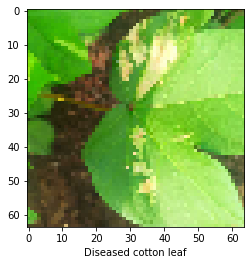

In [44]:
plt.imshow(img)
plt.xlabel("Diseased cotton leaf")

In [45]:
# Part 4 - Making a single prediction
test_image = image.img_to_array(img)
test_image=test_image/255
test_image = np.expand_dims(test_image, axis = 0)
result = model.predict(test_image)

In [46]:
result = np.argmax(result,axis=1)

In [47]:
if result==0:
    print("diseased cotton leaf")
elif result==1:
    print("diseased cotton plant")
elif result==2:
    print("fresh cotton leaf")
elif result==3:
    print("fresh cotton plant")    

diseased cotton leaf
